In [1]:
using LinearAlgebra, PyPlot

In [2]:
coilL, coilR = open("coilDesign.bin", "r") do fobj
    display(filesize(fobj))
    n = zeros(Int64, 3)
    read!(fobj,n)
    _p1 = [zeros(Float64, n[1], 3), zeros(Float64, n[2], 3), zeros(Float64, n[3], 3)]
    _p2 = [zeros(Float64, n[1], 3), zeros(Float64, n[2], 3), zeros(Float64, n[3], 3)]
    [read!(fobj, _p1[i]) for i = 1:3];
    [read!(fobj, _p2[i]) for i = 1:3];
    _p1, _p2
end;

33356424

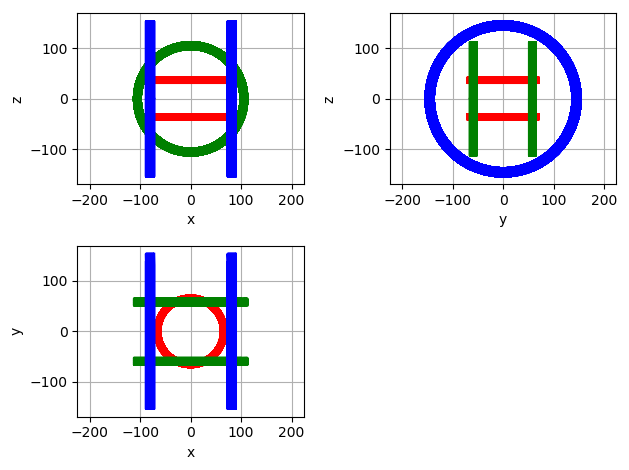

In [11]:
col1 = ["r","g","b"]
col2 = ["m","y","k"]
for i = 1:3
    subplot(2,2,3); plot(coilL[i][:,1], coilL[i][:,2], col1[i]); axis(:equal);grid(:on);
    subplot(2,2,1); plot(coilL[i][:,1], coilL[i][:,3], col1[i]); axis(:equal);grid(:on)
    subplot(2,2,2); plot(coilL[i][:,2], coilL[i][:,3], col1[i]); axis(:equal);grid(:on)        
    subplot(2,2,3); plot(coilR[i][:,1], coilR[i][:,2], col1[i]); axis(:equal);grid(:on); xlabel("x"); ylabel("y")
    subplot(2,2,1); plot(coilR[i][:,1], coilR[i][:,3], col1[i]); axis(:equal);grid(:on); xlabel("x"); ylabel("z")
    subplot(2,2,2); plot(coilR[i][:,2], coilR[i][:,3], col1[i]); axis(:equal);grid(:on); xlabel("y"); ylabel("z")
end
tight_layout()

--------------------------------------

# Biot-Savart Law
<img src="BiotSavartLaw_Diagram.png" alt="Markdown Monster icon" width = "200" >
$$ d\overrightarrow { B } =\frac { \mu _{ o } }{ 4\pi  } \frac { Id\overrightarrow { s } \times \overrightarrow { r }  }{ r^{ 2 } } $$ 

In [238]:
function computeMagFields(I, p, pc)
    flag = zeros(size(p,1)-1).==0;
    flag[361:361:end] .= false; # every 361 points -> next wide
    ds = diff(p, dims=1)
#     ds2 = sqrt.(sum(ds.^2, dims = 2))
    r = hcat(pc[1] .- p[:,1], pc[2] .- p[:,2], pc[3] .- p[:,3])
    r2 = sum(r.^2, dims=2);
    dB0 = zeros(size(ds))
    [dB0[i,:] = μ0/(4*π)*I*cross(ds[i,:], r[i,:])/r2[i] for i = 1:size(ds, 1)]
    sum(dB0[flag,:], dims=1)*1e3
end

computeMagFields (generic function with 1 method)

In [239]:
μ0 = 4π * 1e-7 # Tm/A;
I = 1.0 # A;

In [240]:
pc = [0,0,0]
i = 3;
computeMagFields(I, coilL[i], pc) + computeMagFields(I, coilR[i], pc)

1×3 Array{Float64,2}:
 0.862928  -1.78671e-19  -1.32349e-19

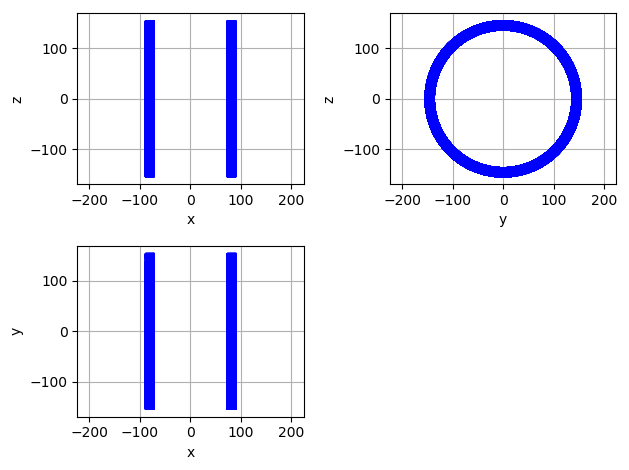

In [237]:
col1 = ["r","g","b"]
col2 = ["m","y","k"]
for i = 3
    subplot(2,2,3); plot(coilL[i][:,1], coilL[i][:,2], col1[i]); axis(:equal);grid(:on);
    subplot(2,2,1); plot(coilL[i][:,1], coilL[i][:,3], col1[i]); axis(:equal);grid(:on)
    subplot(2,2,2); plot(coilL[i][:,2], coilL[i][:,3], col1[i]); axis(:equal);grid(:on)        
    subplot(2,2,3); plot(coilR[i][:,1], coilR[i][:,2], col1[i]); axis(:equal);grid(:on); xlabel("x"); ylabel("y")
    subplot(2,2,1); plot(coilR[i][:,1], coilR[i][:,3], col1[i]); axis(:equal);grid(:on); xlabel("x"); ylabel("z")
    subplot(2,2,2); plot(coilR[i][:,2], coilR[i][:,3], col1[i]); axis(:equal);grid(:on); xlabel("y"); ylabel("z")
end
tight_layout()